In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

db_path = r'C:\Users\Lenovo\Documents\Bioinformatics MSc\2024\Discovery\Basic Database\PreGE\THE_FINAL_ONE.db'

In [7]:
query = '''
WITH SpeciesStudies AS (
    SELECT ss.study_id
    FROM study_species ss
    JOIN species s ON ss.species_id = s.species_id
    WHERE s.species_name = 'brugia_malayi'  -- Filter by the specific species name
),
DifferentialExpression AS (
    SELECT de.gene_id, de.log2FoldChange, de.adj_p_value, de.study_id
    FROM differential_expression de
    JOIN SpeciesStudies ss ON de.study_id = ss.study_id
    WHERE de.log2FoldChange IS NOT NULL
      AND de.adj_p_value IS NOT NULL
),
SignificantGenes AS (
    SELECT de.gene_id,
           AVG(de.log2FoldChange) AS avg_log2FoldChange,
           MAX(-LOG2(de.adj_p_value)) AS max_minus_log2_adj_p_value,
           COUNT(DISTINCT de.study_id) AS num_studies
    FROM DifferentialExpression de
    WHERE de.adj_p_value < 0.05  -- Significance threshold for adjusted p-value
      AND ABS(de.log2FoldChange) > 1  -- Significance threshold for fold change
    GROUP BY de.gene_id
)
SELECT sg.gene_id,
       sg.avg_log2FoldChange,
       sg.max_minus_log2_adj_p_value,
       sg.num_studies
FROM SignificantGenes sg
ORDER BY sg.num_studies DESC;

'''



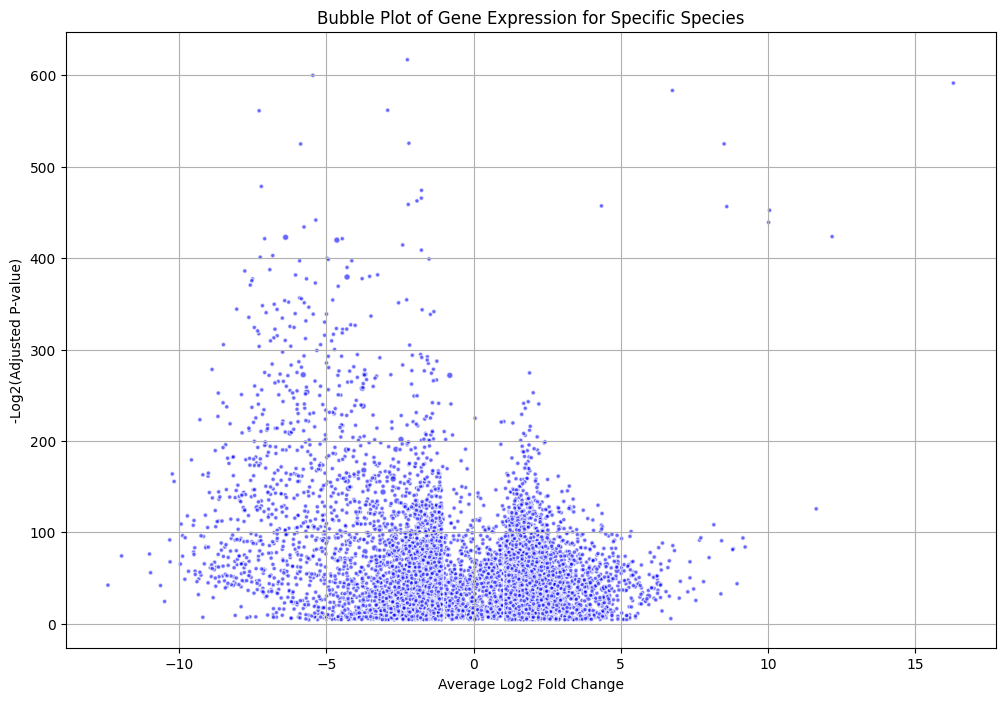

In [8]:

conn = sqlite3.connect(db_path)

# Execute the query and load the data into a DataFrame
bubble_df = pd.read_sql_query(query, conn)
conn.close()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(bubble_df['avg_log2FoldChange'], bubble_df['max_minus_log2_adj_p_value'],
            s=bubble_df['num_studies'] * 10,  # Bubble size scaled by number of studies
            alpha=0.6, edgecolors='w', c='blue')
plt.title('Bubble Plot of Gene Expression for Specific Species')
plt.xlabel('The average log2FoldChange value for each gene across all studies where that gene was identified as significant')
plt.ylabel('-Log2(Adjusted P-value)')
plt.grid(True)
plt.show()


In [15]:
query2 = '''
WITH SpeciesStudies AS (
    SELECT ss.study_id
    FROM study_species ss
    JOIN species s ON ss.species_id = s.species_id
    WHERE s.species_name = 'schistosoma_mansoni'  -- Filter by specific species name
),
DifferentialExpression AS (
    SELECT de.gene_id, de.log2FoldChange, de.adj_p_value, de.study_id
    FROM differential_expression de
    JOIN SpeciesStudies ss ON de.study_id = ss.study_id
    WHERE de.log2FoldChange IS NOT NULL
      AND de.adj_p_value IS NOT NULL
),
SignificantGenes AS (
    SELECT de.gene_id,
           AVG(de.log2FoldChange) AS avg_log2FoldChange,
           MAX(-LOG2(de.adj_p_value)) AS max_minus_log2_adj_p_value,
           COUNT(DISTINCT de.study_id) AS num_studies
    FROM DifferentialExpression de
    WHERE de.adj_p_value < 0.05  -- Significance threshold for adjusted p-value
      AND ABS(de.log2FoldChange) > 1  -- Significance threshold for fold change
    GROUP BY de.gene_id
),
RandomGenes AS (
    SELECT gene_id
    FROM SignificantGenes
    ORDER BY RANDOM()  -- Randomly order the genes
    LIMIT 10           -- Select only 20 random genes
)
SELECT sg.gene_id,
       sg.avg_log2FoldChange,
       sg.max_minus_log2_adj_p_value,
       sg.num_studies
FROM SignificantGenes sg
JOIN RandomGenes rg ON sg.gene_id = rg.gene_id
ORDER BY sg.num_studies DESC;
'''


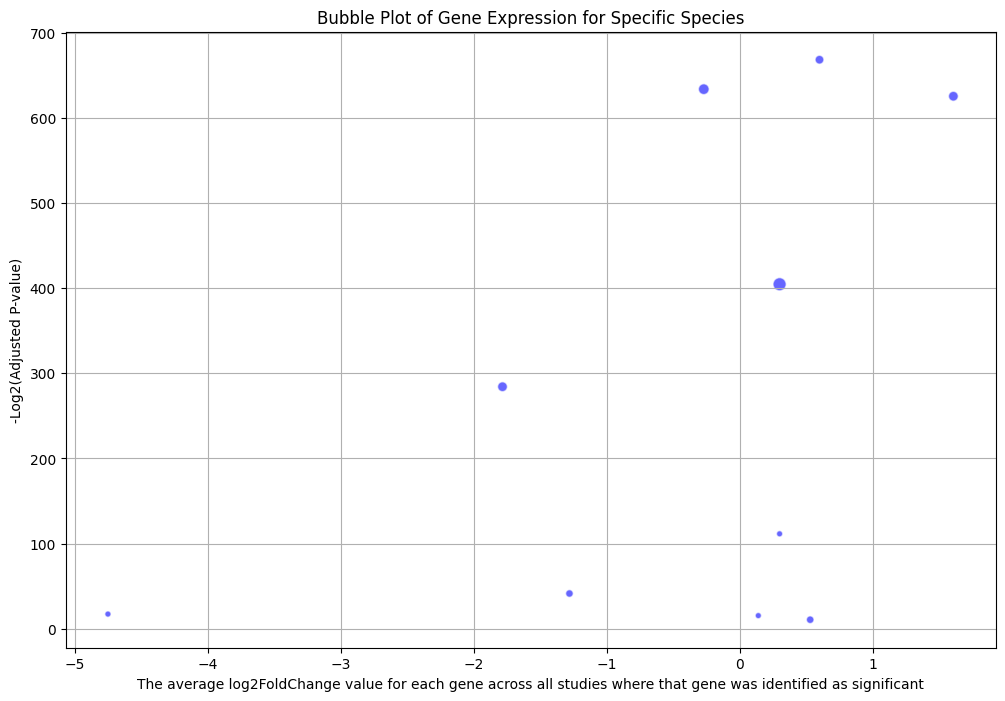

In [16]:

conn = sqlite3.connect(db_path)

# Execute the query and load the data into a DataFrame
bubble_df = pd.read_sql_query(query2, conn)
conn.close()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(bubble_df['avg_log2FoldChange'], bubble_df['max_minus_log2_adj_p_value'],
            s=bubble_df['num_studies'] * 10,  # Bubble size scaled by number of studies
            alpha=0.6, edgecolors='w', c='blue')
plt.title('Bubble Plot of Gene Expression for Specific Species')
plt.xlabel('The average log2FoldChange value for each gene across all studies where that gene was identified as significant')
plt.ylabel('-Log2(Adjusted P-value)')
plt.grid(True)
plt.show()


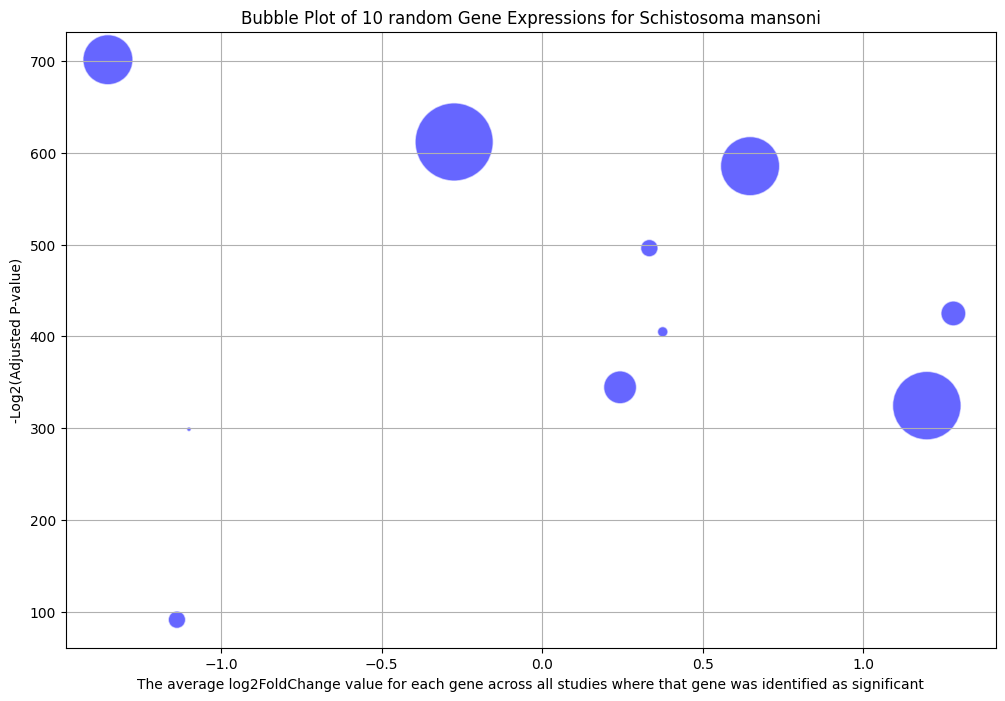

In [19]:

conn = sqlite3.connect(db_path)

# Execute the query and load the data into a DataFrame
bubble_df = pd.read_sql_query(query2, conn)
conn.close()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(bubble_df['avg_log2FoldChange'], bubble_df['max_minus_log2_adj_p_value'],
            s=(bubble_df['num_studies'] ** 2.5) * 10,  # Cubic scaling
            alpha=0.6, edgecolors='w', c='blue')

plt.title('Bubble Plot of 10 random Gene Expressions for Schistosoma mansoni')
plt.xlabel('The average log2FoldChange value for each gene across all studies where that gene was identified as significant')
plt.ylabel('-Log2(Adjusted P-value)')
plt.grid(True)
plt.show()


In [29]:
query3 = '''
    WITH SpeciesStudies AS (
            SELECT ss.study_id
            FROM study_species ss
            JOIN species s ON ss.species_id = s.species_id
            WHERE s.species_name = 'schistosoma_mansoni'  -- Filter by specific species name
        ),
        DifferentialExpression AS (
            SELECT de.gene_id, de.log2FoldChange, de.adj_p_value, de.study_id
            FROM differential_expression de
            JOIN SpeciesStudies ss ON de.study_id = ss.study_id
            WHERE de.log2FoldChange IS NOT NULL
            AND de.adj_p_value IS NOT NULL
        ),
        SignificantGenes AS (
            SELECT de.gene_id,
                AVG(de.log2FoldChange) AS avg_log2FoldChange,
                MAX(-LOG2(de.adj_p_value)) AS max_minus_log2_adj_p_value,
                COUNT(DISTINCT de.study_id) AS num_studies
            FROM DifferentialExpression de
            WHERE de.adj_p_value < 0.05  -- Significance threshold for adjusted p-value
            AND ABS(de.log2FoldChange) > 1  -- Significance threshold for fold change
            GROUP BY de.gene_id
        ),
        RandomGenes AS (
            SELECT gene_id
            FROM SignificantGenes
            ORDER BY RANDOM()  -- Randomly order the genes
            LIMIT 25           -- Select only 20 random genes
        )
        SELECT sg.gene_id,
            sg.avg_log2FoldChange,
            sg.max_minus_log2_adj_p_value,
            sg.num_studies
        FROM SignificantGenes sg
        JOIN RandomGenes rg ON sg.gene_id = rg.gene_id
        ORDER BY sg.num_studies DESC;
    '''

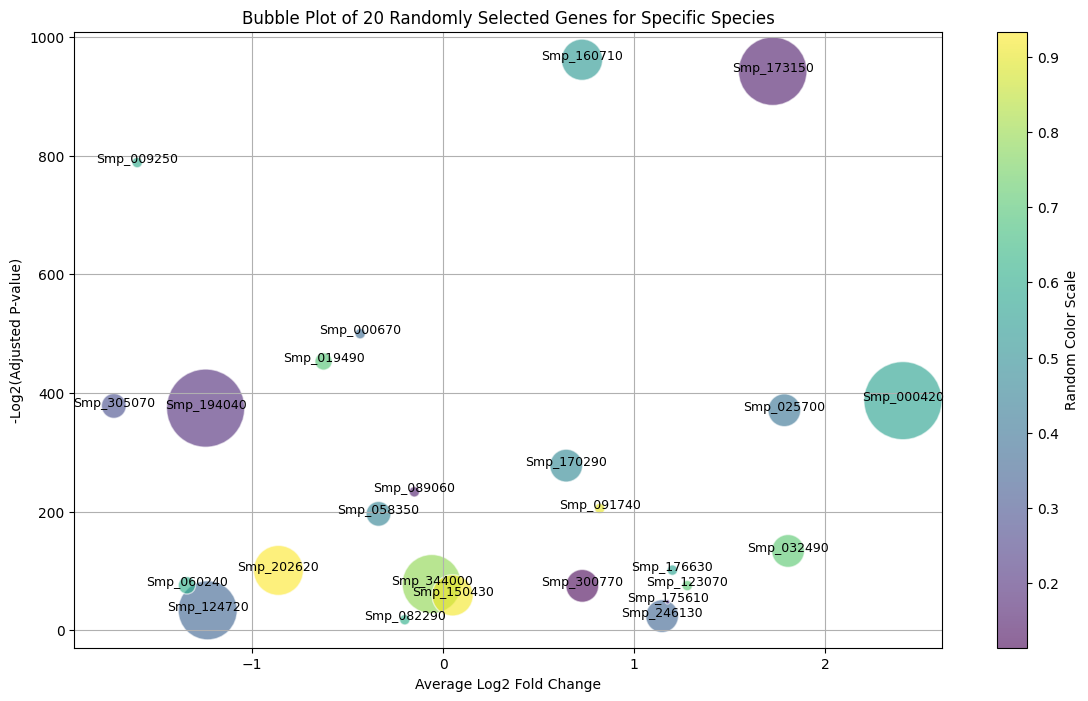

In [32]:

conn = sqlite3.connect(db_path)

# Execute the query and load the data into a DataFrame
bubble_df = pd.read_sql_query(query3, conn)
conn.close()

# Applying cubic scaling to the bubble sizes
plt.figure(figsize=(14, 8))

# Assign colors
colors = np.random.rand(len(bubble_df))  # Assign random colors to each bubble

# Create scatter plot
sc = plt.scatter(bubble_df['avg_log2FoldChange'], bubble_df['max_minus_log2_adj_p_value'],
                 s=(bubble_df['num_studies'] ** 2.5) * 10,  # Apply cubic scaling
                 alpha=0.6, edgecolors='w', c=colors, cmap='viridis')

# Add gene labels to each bubble
for i in range(bubble_df.shape[0]):
    plt.text(bubble_df['avg_log2FoldChange'][i], bubble_df['max_minus_log2_adj_p_value'][i],
             bubble_df['gene_id'][i], fontsize=9, ha='center')

# Customize the plot
plt.title('Bubble Plot of 20 Randomly Selected Genes for Specific Species')
plt.xlabel('Average Log2 Fold Change')
plt.ylabel('-Log2(Adjusted P-value)')
plt.grid(True)
plt.colorbar(sc, label='Random Color Scale')  # Add color bar for the color mapping
plt.show()